<a href="https://colab.research.google.com/github/lorenzophys/deep-learning-playground/blob/main/MNIST_digit_DNN_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scipy.stats import norm

Loading the data from Keras.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

Check the shapes of the images.

In [ ]:
print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


Normalization. Normally you should check, but I already know that the pixels range from 0 to 255.

In [ ]:
train_images, test_images = train_images/255., test_images/255.

I want to try different combinations to see which one gets the best accuracy. It will also be interesting to see what happens without a hidden layer.

In [ ]:
hidden_neurons = [0, 32, 64, 128, 256, 512, 1024]
model = [0] * len(hidden_neurons)

In [ ]:
for i in range(len(hidden_neurons)):
  model[i] = keras.models.Sequential()
  model[i].add(keras.layers.Flatten(input_shape=(28, 28)))
  if i>0:
    model[i].add(keras.layers.Dense(hidden_neurons[i], activation="relu"))
  model[i].add(keras.layers.Dense(10, activation="softmax"))
  model[i].compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [ ]:
history = [0] * len(hidden_neurons)
epochs = 30

In [ ]:
for i in range(len(hidden_neurons)):
  history[i] = model[i].fit(train_images, train_labels,
                            epochs=epochs,
                            validation_data=(test_images, test_labels))

For all the models I used the standard approach: adam optimizer, the sparse categorical crossentropy loss function, the relu activation for the first layers and the softmax for the output layer to encode probablility. For every model I want to check what's the maximum value of the accuracy on the training and validation set.

In [ ]:
for i in range(len(hidden_neurons)):
  print(f"Hidden neurons = {hidden_neurons[i]}, Max train acc = {np.max(history[i].history['accuracy']):.5f}, Max val acc = {np.max(history[i].history['val_accuracy']):.5f}")

Hidden neurons = 0, Max train acc = 0.93537, Max val acc = 0.92880
Hidden neurons = 32, Max train acc = 0.99333, Max val acc = 0.97200
Hidden neurons = 64, Max train acc = 0.99862, Max val acc = 0.97880
Hidden neurons = 128, Max train acc = 0.99932, Max val acc = 0.97990
Hidden neurons = 256, Max train acc = 0.99897, Max val acc = 0.98240
Hidden neurons = 512, Max train acc = 0.99878, Max val acc = 0.98410
Hidden neurons = 1024, Max train acc = 0.99945, Max val acc = 0.98460


The sweet spot seems to be at 256 hidden neurons: having more of them doesn't improve the model much. For sure it's not worth the additional computational cost.

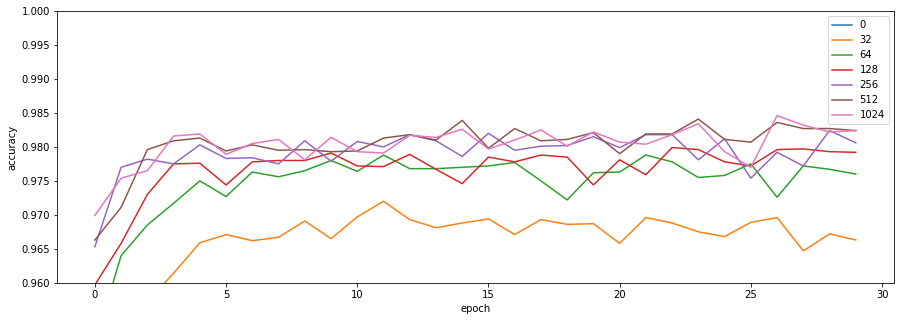

In [ ]:
plt.figure(figsize=(15,5))
for i in range(len(hidden_neurons)):
  plt.plot(history[i].history["val_accuracy"])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(hidden_neurons)
plt.gca().set_ylim([0.96,1])
plt.show()

It's clear that even the worst performing deep model performs better than the shallow model.

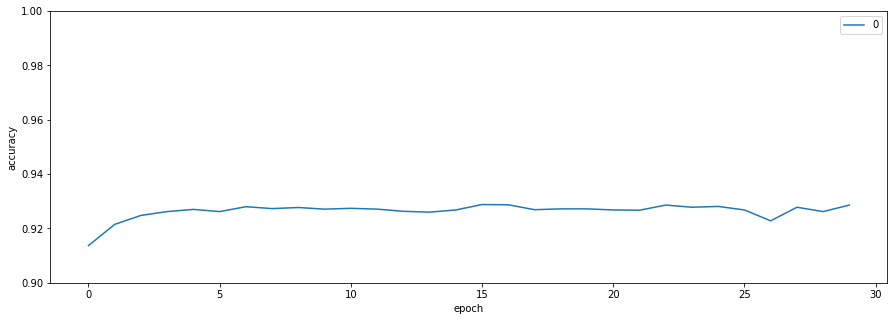

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history[0].history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(hidden_neurons)
plt.gca().set_ylim([0.9,1])
plt.show()

The next question then is: if deep is better than shallow, then why not adding more layers?

In [ ]:
second_hidden = [32, 64, 128, 256]
model_2 = [0] * len(second_hidden)

In [ ]:
for i in range(len(second_hidden)):
  model_2[i] = keras.models.Sequential()
  model_2[i].add(keras.layers.Flatten(input_shape=(28, 28)))
  model_2[i].add(keras.layers.Dense(256, activation="relu"))
  model_2[i].add(keras.layers.Dense(second_hidden[i], activation="relu"))
  model_2[i].add(keras.layers.Dense(10, activation="softmax"))
  model_2[i].compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [ ]:
history_2 = [0] * len(second_hidden)
epochs_2 = 30

In [ ]:
for i in range(len(second_hidden)):
  history_2[i] = model_2[i].fit(train_images, train_labels,
                            epochs=epochs_2,
                            validation_data=(test_images, test_labels),
                            verbose=0)
  print(f"DNN: 256-{second_hidden[i]}, Max train acc = {np.max(history_2[i].history['accuracy']):.5f}, Max val acc = {np.max(history_2[i].history['val_accuracy']):.5f}")

DNN: 256-32, Max train acc = 0.99862, Max val acc = 0.98290
DNN: 256-64, Max train acc = 0.99835, Max val acc = 0.98150
DNN: 256-128, Max train acc = 0.99853, Max val acc = 0.98330
DNN: 256-256, Max train acc = 0.99813, Max val acc = 0.98330


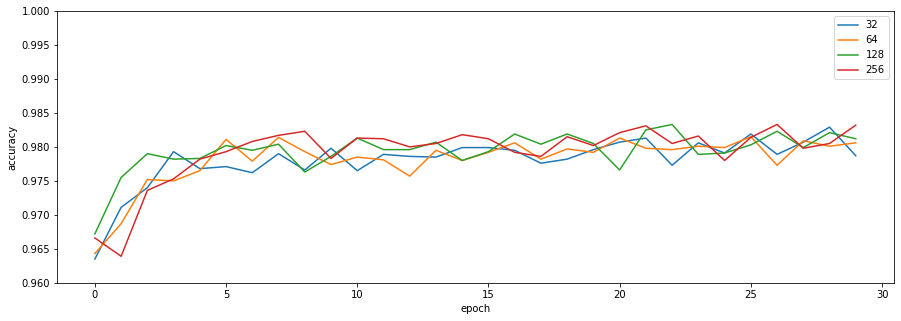

In [ ]:
plt.figure(figsize=(15,5))
for i in range(len(second_hidden)):
  plt.plot(history_2[i].history["val_accuracy"])

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(second_hidden)
plt.gca().set_ylim([0.96,1])
plt.show()

So apparently having more layers doesn't always mean better performing models. In this case the improvements in the accuracy do not justify the additional computational cost.

Let's now focus on the best performing model so far: DNN with 784-256-10. I will train 100 of them and see what's the average best performace.

In [ ]:
model_best = [0] * 100

In [ ]:
for i in range(100):
  model_best[i] = keras.models.Sequential()
  model_best[i].add(keras.layers.Flatten(input_shape=(28, 28)))
  model_best[i].add(keras.layers.Dense(256, activation="relu"))
  model_best[i].add(keras.layers.Dense(10, activation="softmax"))
  model_best[i].compile(optimizer="adam",
                        loss="sparse_categorical_crossentropy",
                        metrics=["accuracy"])

In [ ]:
history_best = [0] *100
epochs_best = 10
best_accuracy = []

In [ ]:
for i in range(100):
  history_best[i] = model_best[i].fit(train_images, train_labels,
                            epochs=epochs_best,
                            validation_data=(test_images, test_labels),
                            verbose=0)
  best_accuracy.append(np.max(history_best[i].history['val_accuracy']))
  print(f"{i} Best accuracy: {np.max(history_best[i].history['val_accuracy'])}")

mu = 0.9811, std = 0.0009


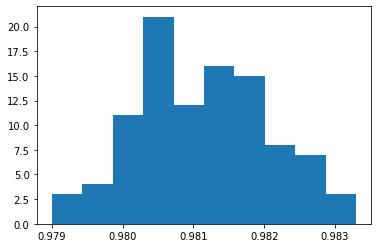

In [ ]:
mu, std = norm.fit(best_accuracy)
print(f"mu = {mu:.4f}, std = {std:.4f}")
plt.hist(best_accuracy, bins=10)
plt.show()

For this problem a deep network 784-256-10 has an average accuracy of 98.11% with a standard deviation of 9e-4.